# L1 and L2 Regularization

**L1 Sum of Squred Error Function** <br>
$ \frac{\lambda}{N} | w | $ 이 부분은 앞의 $ sum $에 포함되지 않음

$$ J(w) = \frac{1}{N} \sum^N_{i=1} (y - \phi(z))^2 + \frac{\lambda}{N} | w |  $$

**L2 Sum of Squred Error Function**<br>
$\frac{\lambda}{N} w^2 $ 이 부분은 앞의 $ sum $에 포함되지 않음

$$ J(w) = \frac{1}{N} \sum^N_{i=1} (y - \phi(z))^2 + \frac{\lambda}{N} w^2 $$


* [Regularized Linear Regression](https://www.coursera.org/learn/machine-learning/lecture/QrMXd/regularized-linear-regression)

### Derivative of L2 cost function


$$ \frac{\partial}{\partial w} = \Delta w = \frac{\lambda}{N} w -  \frac{2}{N} \sum^N_{i=1} -x_i(y_i - \sum_{j=0}(w_j x_j )) $$



$$ \frac{\partial}{\partial b} = \Delta b = \frac{\lambda}{N} w - \frac{2}{N} \sum^N_{i=1} -(y_i - \sum_{j=0}(w_j x_j)) $$



따라서 weights와 bias의 업데이트는 다음과 같이 합니다. 

$$ w = w - \eta \cdot \Delta w $$

$$ b = b - \eta \cdot \Delta b $$

In [1]:
%pylab inline
import numpy as np
import pandas as pd
from pprint import pprint as pp

np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


### Data

**x값**은 1에다가 다음의 값을 나눈것과 같습니다. <br>
즉 숫자가 커지면 커질수록 1로 나누기 때문에 결론적으로 값은 작아집니다.<br>
따라서 rows를 따라 내려가면 내려갈수록 값은 작아집니다. 

```
[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]
 [ 5  6  7  8  9 10 11 12 13 14]
 [ 6  7  8  9 10 11 12 13 14 15]
 [ 7  8  9 10 11 12 13 14 15 16]
 [ 8  9 10 11 12 13 14 15 16 17]
 [ 9 10 11 12 13 14 15 16 17 18]
 [10 11 12 13 14 15 16 17 18 19]]
 ```
 
 **alphas**의 경우 10^-10 부터 시작해서 10^0 으로 값이 커지는 vector값입니다.<br>
 대충 이렇게 생겼습니다.
 
 ```
 [1^-10, 1^-9, 1^-8, ... 1^0]
 ```

In [2]:
x = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
x = np.round(x, decimals=3)
y = np.ones(10)


n_alphas = 200
alphas = np.logspace(-10, 0, n_alphas) # 10**np.linspace(-10, 0, n_alphas)

print(x)

[[ 1.     0.5    0.333  0.25   0.2    0.167  0.143  0.125  0.111  0.1  ]
 [ 0.5    0.333  0.25   0.2    0.167  0.143  0.125  0.111  0.1    0.091]
 [ 0.333  0.25   0.2    0.167  0.143  0.125  0.111  0.1    0.091  0.083]
 [ 0.25   0.2    0.167  0.143  0.125  0.111  0.1    0.091  0.083  0.077]
 [ 0.2    0.167  0.143  0.125  0.111  0.1    0.091  0.083  0.077  0.071]
 [ 0.167  0.143  0.125  0.111  0.1    0.091  0.083  0.077  0.071  0.067]
 [ 0.143  0.125  0.111  0.1    0.091  0.083  0.077  0.071  0.067  0.062]
 [ 0.125  0.111  0.1    0.091  0.083  0.077  0.071  0.067  0.062  0.059]
 [ 0.111  0.1    0.091  0.083  0.077  0.071  0.067  0.062  0.059  0.056]
 [ 0.1    0.091  0.083  0.077  0.071  0.067  0.062  0.059  0.056  0.053]]


### Model

여기서 만든 LinearRegression은 y-intercept 계산을 하지 않습니다. 

In [55]:

class LinearRegression(object):
    
    def __init__(self, input_size=10):
        self.input_size = input_size
        self.w = np.random.randn(self.input_size)
    
    def gradient_descent(self, x, y, alpha=0, eta=0.1):
        _w = np.zeros(self.input_size)
        N = float(len(x))
        for i in range(0, int(N)):
            update = -(y[i] - self.predict(x[i]))
            regularization = alpha/N * self.w
            _w +=  (regularization + (2/N)*update*x[i])
        self.w = self.w - eta * _w
        
    def predict(self, x):
        return self.w.dot(x) 
    
    def fit(self, x, y, alpha=0, n_epoch=10):
        
        for epoch in range(n_epoch):
            w = self.gradient_descent(x, y, alpha=alpha, eta=0.02)
        yhat = self.predict(x)
    

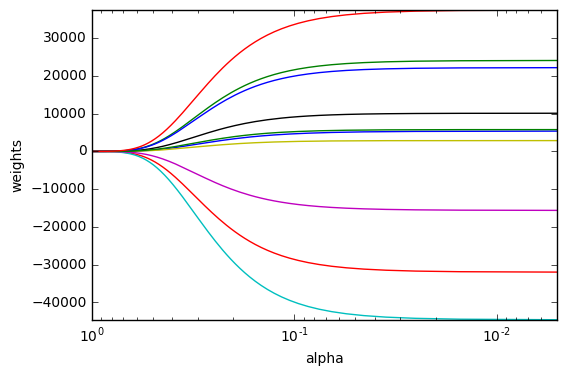

In [56]:
model = LinearRegression()
coefs = []
alphas = np.linspace(-1, 1, 200)
for a in alphas:
    
    model.fit(x, y, alpha=a)
    coefs.append(model.w)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')

plt.axis('tight')
plt.show()